In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os, glob
import seaborn as sns
from scipy.optimize import curve_fit
plt.style.use("ggplot")
cm = 1/2.54

In [2]:
#conff0 = glob.glob('data/Conformation_A001f0s**.txt')
conff0 = glob.glob('data/ConfT5F0S**.txt')
conff0 = sorted(conff0)
# conff1 = glob.glob('data/Conformation_A001f1s**.txt')
# conff1 = sorted(conff1)

In [3]:
conff0

['data/ConfT5F0S21.txt',
 'data/ConfT5F0S22.txt',
 'data/ConfT5F0S23.txt',
 'data/ConfT5F0S24.txt',
 'data/ConfT5F0S25.txt']

In [32]:
beads = 13; 
#jmp = 5 ; dt = 'dt05'; Dt = 0.05
#jmp = 10 ; dt = 'dt1'; Dt = 0.1
#jmp = 20 ; dt = 'dt2'; Dt = 0.2
#jmp = 30 ; dt = 'dt3'; Dt = 0.3
jmp = 50 ; dt = 'dt5'; Dt = 0.5
v0 = 7.2; v1 = 7.8

conf0 = []; conf1 = []; 
xdiff0 = []; ydiff0 = []; 
xdiff1 = []; ydiff1 = []; 
bf0 = []; bf1 = []

for i in conff0:
    _ = pd.read_csv(i, names=['t','x','y','z'], delim_whitespace=True)
    _ = _[0::beads]
    _ = _[0::jmp]
    conf0.append(_)
    xdiff0.append(np.diff(_['x']))
    ydiff0.append(np.diff(_['y']))
    
# for j in conff1:
#     _ = pd.read_csv(j, names=['t','x','y','z'], delim_whitespace=True)
#     _ = _[0::beads]
#     _ = _[0::jmp]
#     conf1.append(_)
#     xdiff1.append(np.diff(_['x']))
#     ydiff1.append(np.diff(_['y']))


$|b_1| = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$

$U_{b1} = \frac{1}{|b_1|} \times ((x_2-x_1), (y_2-y_1))$

In [33]:
ubx0 = []; uby0 = []
ubx1 = []; uby1 = []

for i in range(len(xdiff0)):
    b0 = np.sqrt(xdiff0[i]**2 + ydiff0[i]**2)
    ubx0.append(xdiff0[i]/b0)
    uby0.append(ydiff0[i]/b0)

# for j in range(len(xdiff1)):
#     b1 = np.sqrt(xdiff1[j]**2 + ydiff1[j]**2)
#     ubx1.append(xdiff1[j]/b1)
#     uby1.append(ydiff1[j]/b1)

In [34]:
ub0 = []; ub1 = []

for i in range(len(ubx0)):
    ub0.append(pd.DataFrame({'ubx':ubx0[i], 'uby':uby0[i]}))
    
# for j in range(len(ubx1)):
#     ub1.append(pd.DataFrame({'ubx':ubx1[j], 'uby':uby1[j]}))

for $\Delta s = 1$, calculate $<cos \Delta \theta(1)>$: <br>
mean of $Ub_1\cdot Ub_{1+1} + Ub_2\cdot Ub_{2+1} + Ub_3\cdot Ub_{3+1} + \cdots + Ub_{L-1}\cdot Ub_L$ <br>

for $\Delta s = 2$, calculate $<cos \Delta \theta(2)>$: <br>
mean of $Ub_1\cdot Ub_{1+2} + Ub_2\cdot Ub_{2+2} + Ub_3\cdot Ub_{3+2} + \cdots + Ub_{L-2}\cdot Ub_L$ <br>

Persistence length = plot(s,mean of Ubs)

In [35]:
_ = []; ds0 = []; dsm0 = []; s0 = []; c = 0; ds0_ = []; dsm_ = []; s_ = []

# try:
#     os.remove('ds_ub_status.txt')
# except:
#     print("'ds_ub_status.txt' does not exist.")
    
for h in range(len(ub0)):
    for i in range(len(ub0[h])): # len(ub0[h])-1
#         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
        for j in range(len(ub0[h])): # len(ub0[h])-1
            try:
                _.append(np.dot(ub0[h].loc[j].values,ub0[h].loc[j+i].values))
#                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
            except:
                pass #print("No: Ub%s.Ub%s"%(j,j+i))
        ds0_.append(_) # not necessary to save or is it?
        dsm_.append(np.mean(_))
        s_.append(c)
        _ = [] # empty this bucket
        c+=1
    s0.append(s_)
    dsm0.append(dsm_)
    ds0.append(ds0_)
    c = 0; ds0_ = []; dsm_ = []; s_ = [] # reset stuff

s0 = np.array(s0)
#ds0 = np.array(ds0)
dsm0 = np.array(dsm0)

In [36]:
# _ = []; ds1 = []; dsm1 = []; s1 = []; c = 0; ds1_ = []; dsm_ = []; s_ = []

# # try:
# #     os.remove('ds_ub_status.txt')
# # except:
# #     print("'ds_ub_status.txt' does not exist.")
    
# for h in range(len(ub1)):
#     for i in range(len(ub1[h])-1):
# #         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
#         for j in range(len(ub1[h])-1):
#             try:
#                 _.append(np.dot(ub1[h].loc[j].values,ub1[h].loc[j+i].values))
# #                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
#             except:
#                 pass #print("No: Ub%s.Ub%s"%(j,j+i))
#         ds1_.append(_) # not necessary to save
#         dsm_.append(np.mean(_))
#         s_.append(c)
#         _ = [] # empty this bucket
#         c+=1
#     s1.append(s_)
#     dsm1.append(dsm_)
#     ds1.append(ds1_)
#     c = 0; ds1_ = []; dsm_ = []; s_ = [] # reset stuff

# s1 = np.array(s1)
# #ds1 = np.array(ds1)
# dsm1 = np.array(dsm1)

In [37]:
len(s0)

5

In [38]:
# Run the whole program as many times as the Dt needed

dfs0 = pd.DataFrame({'s00':s0[0], 's01':s0[1], 's02':s0[2], 's03':s0[3], 's03':s0[4]})
dfdsm0 = pd.DataFrame({'dsm00':dsm0[0], 'dsm01':dsm0[1], 'dsm02':dsm0[2], 'dsm03':dsm0[3], 'dsm03':dsm0[4]})

s0_m = dfs0.mean(axis=1)*v0*Dt
s0_m.to_csv('data/s0_m'+dt+'.csv', index=False)
dsm0_m = dfdsm0.mean(axis=1)
dsm0_m.to_csv('data/dsm0_m'+dt+'.csv', index=False)

# dfs1 = pd.DataFrame({'s10':s1[0], 's11':s1[1], 's12':s0[2], 's13':s1[3]})
# dfdsm1 = pd.DataFrame({'dsm10':dsm1[0], 'dsm11':dsm1[1], 'dsm12':dsm1[2], 'dsm13':dsm1[3]})

# s1_m = dfs1.mean(axis=1)*v1*Dt
# s1_m.to_csv('data/s1_m'+dt+'.csv', index=False)
# dsm1_m = dfdsm1.mean(axis=1)
# dsm1_m.to_csv('data/dsm1_m'+dt+'.csv', index=False)

In [39]:
s0_ = glob.glob('data/s0_mdt**.csv')
s0_ = sorted(s0_)
# s1_ = glob.glob('data/s1_mdt**.csv')
# s1_ = sorted(s1_)
dsm0_ = glob.glob('data/dsm0_mdt**.csv')
dsm0_ = sorted(dsm0_)
# dsm1_ = glob.glob('data/dsm1_mdt**.csv')
# dsm1_ = sorted(dsm1_)

In [40]:
s0_

['data/s0_mdt05.csv',
 'data/s0_mdt1.csv',
 'data/s0_mdt2.csv',
 'data/s0_mdt3.csv',
 'data/s0_mdt5.csv']

In [41]:
s0m = []; s1m = []; dsm0 = []; dsm1 = []

for i in s0_:
    _ = pd.read_csv(i, names=['s0m'])
    s0m.append(_)
    
# for j in s1_:
#     _ = pd.read_csv(j, names=['s1m'])
#     s1m.append(_)
    
for k in dsm0_:
    _ = pd.read_csv(k, names=['dsm0'])
    dsm0.append(_)
    
# for l in dsm1_:
#     _ = pd.read_csv(l, names=['dsm1'])
#     dsm1.append(_)

In [42]:
len(dsm0)

5

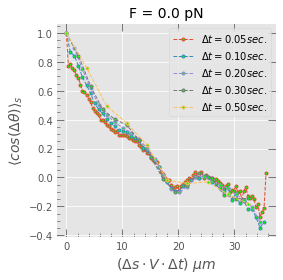

In [58]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

dts = [0.05,0.1,0.2,0.3,0.5]; c=0

for i in range(len(s0m)):
    ax.plot(s0m[i],dsm0[i], marker='o', markersize=3, ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = %.2f sec.$'%dts[c])
    c+=1
ax.minorticks_on()
ax.tick_params('both', direction='in', top=True, right=True, \
length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$(\Delta s \cdot V \cdot \Delta t)\ \mu m$', fontsize=14)
ax.set_ylabel(r'$\langle cos (\Delta \theta) \rangle_s$', fontsize=14)
ax.set_title('F = 0.0 pN', fontsize=14)
plt.legend()

#plt.savefig('fig/Lp-Dt-changes.pdf', format='pdf', bbox_inches='tight')
plt.show()